<a href="https://colab.research.google.com/github/mgje/PIUMP/blob/master/coLab-Notebooks/Animationen_und_Spielereien_mit_Lotto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1D Animationen im Gamedesign

1D Animation werden für dynamische Effekte verwendet.
Zum Beispiel für:
- die Bewegung von Objekten entlang eines Pfades,
- das Erscheinen von Objekten oder
- das Vergrössern von Objekten verwendet

Ideen und Beispiele stammen von der 
Game Developers Conference 2015, San Francisco

[YouTube: Math for Game Programmers: Fast and Funky 1D Nonlinear Transformations](https://www.youtube.com/watch?v=mr5xkf6zSzk)



## Bibliotheken importieren

- Drücken Sie auf den Pfeil [&#9654;&#65039;] in deb Zelle unterhalb um diese auszuführen

oder wählen Sie:

- Alle Zellen in Notebook ausführen⌘/Ctrl+F9

In [71]:
# import Bibliotheken
import numpy as np
from matplotlib.patches import Circle, Wedge, Polygon, Arrow, ArrowStyle, RegularPolygon,Rectangle
import matplotlib.lines as lines
from matplotlib.collections import PatchCollection
from matplotlib import animation,rc
from IPython.display import HTML
from IPython.display import clear_output
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import time
from base64 import b64encode
plt.style.use('seaborn-white')

#%matplotlib --list
#plt.style.available


# Animation als Sequenz einzelner Bilder nach dem Prinzip Daumenkino

![Daumenkino](https://static.geo.de/bilder/ed/34/89088/article_image_big/daumenkino.png)

## Text von links nach rechts bewegen

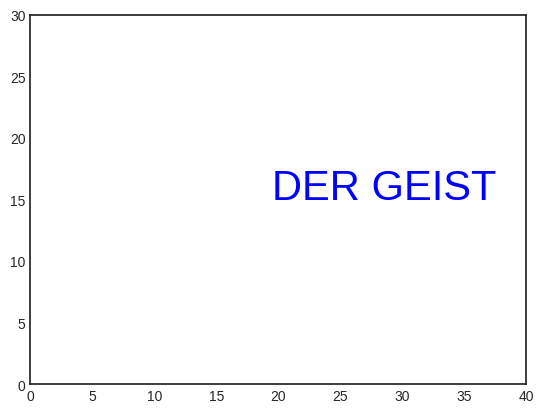

In [72]:
mein_text = "DER GEIST"

# 30x bewegen
for x in range(30):
  # Bildschirm löschen
  clear_output(wait=True)
  # Text an Position schreiben
  plt.text(0.5*x+5,15,mein_text,size=30,c='b')
  # Ausgabefenster definieren x0, x1, y0, y1
  l = plt.axis((0 , 40 , 0 , 30))
  plt.style.use('seaborn-white')
  plt.show() 



## JavaScript Animation aus einer Sequenz von Bildern (jshtml)

- kann Schritt für Schritt betrachtet werden


In [73]:

# 1. Ausschnitt definieren
fig, ax = plt.subplots(figsize=(6,4))

ax.set_xlim(( 0, 40))
ax.set_ylim(( 0, 30))
plt.rcParams.update(plt.rcParamsDefault)

# oder 
# plt.axis((0 , 40 , 0 , 30))
t=plt.text(0,15,'Der Geist',size=30, c='b') 
#ax.set_axis_off()
plt.close()

# 2. Start 
def init():
    t.set_x(5)
    return (t,)

# 3. Animationsfunktion wird immer wieder aufgerufen mit neuem i
def animate(i):
    t.set_x(i*0.5)
    t.set_rotation(i*0.7)
    return (t,)


# 4. Animation aufrufen, blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=60, interval=15, blit=False)

rc('animation',html='jshtml')
display(anim)

## Animated gif einer Sequenz von Bildern (gif)

- können in Präsentaionen direkt eingesetzt werden.

- lassen sich per Social Media oder Mail verteilen

animated gif, braucht etwas Zeit



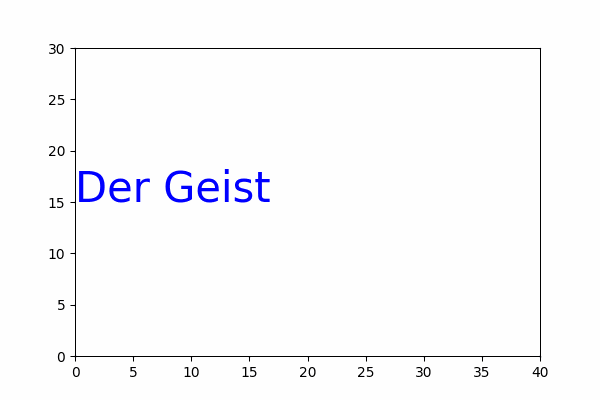

In [74]:
from matplotlib.animation import FuncAnimation, PillowWriter


# 1. Ausschnitt definieren
fig, ax = plt.subplots(figsize=(6,4))

ax.set_xlim(( 0, 40))
ax.set_ylim(( 0, 30))
plt.rcParams.update(plt.rcParamsDefault)
# oder 
# plt.axis((0 , 40 , 0 , 30))
t=plt.text(0,15,'Der Geist',size=30, c='b') 
#ax.set_axis_off()
plt.close()

# 2. Start 
def init():
    t.set_x(5)
    return (t,)

# 3. Animationsfunktion wird immer wieder aufgerufen mit neuem i
def animate(i):
    t.set_x(i*0.5)
    t.set_rotation(i*0.7)
    return (t,)


# 4. Animation aufrufen, blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=60, interval=30, blit=True)


print('animated gif, braucht etwas Zeit')
fn='out2.gif'

writergif = animation.PillowWriter(fps=40) 

#als Datei speichern
anim.save(fn,writer=writergif)


#Film aus Datei laden
gif = open(fn,'rb').read()
#Film in base64 codieren
data_url = "data:image/gif;base64," + b64encode(gif).decode()


#HTMLausgabe
display(HTML('''
  <img src='%s' >
  
''' % data_url))

## Film aus einer Sequenz von Bildern (mp4)

- können in Präsentaionen direkt eingesetzt werden.

- lassen sich per Social Media oder Mail verteilen

In [75]:
from matplotlib.animation import FuncAnimation, PillowWriter

plt.rcParams.update(plt.rcParamsDefault)
# 1. Ausschnitt definieren
fig, ax = plt.subplots(figsize=(8,6))

ax.set_xlim(( 0, 40))
ax.set_ylim(( 0, 30))

# oder 
# plt.axis((0 , 40 , 0 , 30))
t=plt.text(0,15,'Der Geist',size=30, c='b') 
#ax.set_axis_off()
plt.close()

# 2. Start 
def init():
    t.set_x(5)
    return (t,)

# 3. Animationsfunktion wird immer wieder aufgerufen mit neuem i
def animate(i):
    t.set_x(i*0.5)
    t.set_rotation(i*0.7)
    return (t,)


# 4. Animation aufrufen, blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=60, interval=30, blit=True,repeat=False)


print('Video Ausgabe, braucht etwas Zeit')
fn='movie.mp4'

writervideo = animation.FFMpegWriter(fps=60,extra_args=['-dpi', '300'] )
anim.save(fn, writer=writervideo)

#Film aus Datei laden
mp4 = open(fn,'rb').read()
#Film in base64 codieren
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()


#HTMLausgabe
display(HTML('''
  <video autoplay="autoplay" loop="loop" controls="controls" >
    <source src="%s" type='video/mp4'  />
  </video>
''' % data_url))



Video Ausgabe, braucht etwas Zeit


# Bewegung einer Kurve

In [76]:
plt.style.use('dark_background')

# 1. Ausschnitt definieren
fig, ax = plt.subplots(figsize=(8,6))

ax.set_xlim(( -80, 80))
ax.set_ylim(( -60, 60))

line, = ax.plot([], [], lw=2) 


# initialization function 
def init(): 
	# creating an empty plot/frame 
	line.set_data([], []) 
	return line, 

# lists to store x and y axis points 
xdata, ydata = [], [] 

# animation function 
def animate(i): 
	# t is a parameter 
	t = 0.1*i 
	
	# x, y values to be plotted 
	x = t*np.sin(t) 
	y = t*np.cos(t) 
	
	# appending new points to x, y axes points list 
	xdata.append(x) 
	ydata.append(y) 
	line.set_data(xdata, ydata) 
	return line, 
	
# setting a title for the plot 
plt.title('Erzeuge eine Spirale') 
# hiding the axis details 
plt.axis('off') 
plt.close()

# call the animator	 
anim = animation.FuncAnimation(fig, animate, init_func=init, 
							frames=500, interval=20, blit=True) 

print('Video Ausgabe, braucht etwas Zeit')
fn='spirale.mp4'

writervideo = animation.FFMpegWriter(fps=60,extra_args=['-dpi', '300'] )
anim.save(fn, writer=writervideo)

#Film aus Datei laden
mp4 = open(fn,'rb').read()
#Film in base64 codieren
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()


#HTMLausgabe
display(HTML('''
  <video autoplay="autoplay" loop="loop" controls="controls" >
    <source src="%s" type='video/mp4'  />
  </video>
''' % data_url))

Video Ausgabe, braucht etwas Zeit


In [77]:
plt.style.use('dark_background')

# 1. Ausschnitt definieren
fig, ax = plt.subplots(figsize=(8,6))

ax.set_xlim(( 0, 1))
ax.set_ylim(( -1, 1))

#Data
xs = np.arange(0,1,0.01)
ys = xs*xs*np.sin(10*xs)

data, = ax.plot([], [], lw=2) 

# initialization function 
def init(): 
	# creating an empty plot/frame 
	data.set_data([], []) 
	return data, 



# animation function 
def animate(i):
    data.set_data(xs[:i], ys[:i]) 
    return data, 

plt.xlabel('x')
plt.ylabel('y')
plt.title('Live graph with matplotlib')	
plt.close()

# call the animator	 
anim = animation.FuncAnimation(fig, animate,init_func=init,
							frames=100, interval=20, blit=True) 

print('Video Ausgabe, braucht etwas Zeit')
fn='liveg.mp4'

writervideo = animation.FFMpegWriter(fps=60,extra_args=['-dpi', '300'] )
anim.save(fn, writer=writervideo)

#Film aus Datei laden
mp4 = open(fn,'rb').read()
#Film in base64 codieren
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()


#HTMLausgabe
display(HTML('''
  <video autoplay="autoplay" loop="loop" controls="controls" >
    <source src="%s" type='video/mp4'  />
  </video>
''' % data_url))

Video Ausgabe, braucht etwas Zeit


# Gleichzeitige Animationen mit unterschiedlicher Dynamik



In [78]:
# Zeit Funktion zwischen 0 und 1
def f(t,a,frames=160,l=10):
  if a < 0:
    return (1-(1-(t/frames))**(-1*a))*l
  return (t/frames)**a*l

Figur nach rechts bewegen


In [79]:
from matplotlib.animation import FuncAnimation, PillowWriter

# 1. Ausschnitt definieren
fig, ax = plt.subplots(figsize=(6,4))

ax.set_xlim(( -1, 11))
ax.set_ylim(( 0, 8))
plt.rcParams.update(plt.rcParamsDefault)

pol = RegularPolygon((0, 9), 3, 0.25, orientation=-np.pi/2)
p=ax.add_patch(pol)
p.set_alpha(0.8)
p.set_color("green")


pol2 = RegularPolygon((0, 9), 3, 0.25, orientation=-np.pi/2)
p2=ax.add_patch(pol2)
p2.set_alpha(0.8)
p2.set_color("blue")

pol3 = RegularPolygon((0, 9), 3, 0.25, orientation=-np.pi/2)
p3=ax.add_patch(pol3)
p3.set_alpha(0.8)
p3.set_color("red")

pol4 = RegularPolygon((0, 9), 3, 0.25, orientation=-np.pi/2)
p4=ax.add_patch(pol4)
p4.set_alpha(0.8)
p4.set_color("orange")

#ax.set_axis_off()
plt.close()

# 2. Start 
def init():
    pol.xy=(0,7)
    pol2.xy=(0,5)
    pol3.xy=(0,3)
    pol4.xy=(0,1)

    return [pol,pol2,pol3,pol4]

# 3. Animationsfunktion wird immer wieder aufgerufen mit neuem i
def animate(i):
    pol.xy=(f(i,2),7)
    pol2.xy=(f(i,1),5)
    pol3.xy=(f(i,-1.5),3)
    pol4.xy=(f(i,-2),1)
    return [pol,pol2,pol3,pol4]


# 4. Animation aufrufen, blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=160, interval=15, blit=True)

rc('animation',html='jshtml')
display(anim)

In [80]:
fig = plt.figure(figsize=(8,4))
# 5 Fenster einrichten
ax1 = plt.subplot2grid((4, 5), (0, 0), colspan=4, rowspan=4)
ax2 = plt.subplot2grid((4, 5), (0, 4))
ax3 = plt.subplot2grid((4, 5), (1, 4))
ax4 = plt.subplot2grid((4, 5), (2, 4))
ax5 = plt.subplot2grid((4, 5), (3, 4))

ax1.set_xlim(( -1, 11))
ax1.set_ylim(( 0, 8))
plt.rcParams.update(plt.rcParamsDefault)

ax1.set_axis_off()
ax2.get_xaxis().set_ticks([])
ax3.get_xaxis().set_ticks([])
ax4.get_xaxis().set_ticks([])

pol = RegularPolygon((0, 9), 3, 0.25, orientation=-np.pi/2)
p=ax1.add_patch(pol)
p.set_alpha(0.8)
p.set_color("green")


pol2 = RegularPolygon((0, 9), 3, 0.25, orientation=-np.pi/2)
p2=ax1.add_patch(pol2)
p2.set_alpha(0.8)
p2.set_color("blue")

pol3 = RegularPolygon((0, 9), 3, 0.25, orientation=-np.pi/2)
p3=ax1.add_patch(pol3)
p3.set_alpha(0.8)
p3.set_color("red")

pol4 = RegularPolygon((0, 9), 3, 0.25, orientation=-np.pi/2)
p4=ax1.add_patch(pol4)
p4.set_alpha(0.8)
p4.set_color("orange")

# Graphen Dynamik

tframes = 160
dt = 1.0/tframes
ts = np.arange(0,1,dt)
ys1 = f(ts,1,frames=1,l=1)
ys2 = f(ts,2,frames=1,l=1)
ysm15 = f(ts,-1.5,frames=1,l=1)
ysm20 = f(ts,-2,frames=1,l=1)

dataf1, = ax2.plot(ts, ys2, lw=1)
dataf2, = ax3.plot(ts, ys1, lw=1) 
dataf3, = ax4.plot(ts, ysm15, lw=1) 
dataf4, = ax5.plot(ts, ysm20, lw=1)  

plt.close()

# 2. Start 
def init():
    pol.xy=(0,7)
    pol2.xy=(0,5)
    pol3.xy=(0,3)
    pol4.xy=(0,1)
    dataf1.set_data([], []) 
    dataf2.set_data([], []) 
    dataf3.set_data([], []) 
    dataf4.set_data([], []) 

    return [pol,pol2,pol3,pol4,dataf1,dataf2,dataf3,dataf4]

# 3. Animationsfunktion wird immer wieder aufgerufen mit neuem i
def animate(i):
    pol.xy=(f(i,2),7)
    pol2.xy=(f(i,1),5)
    pol3.xy=(f(i,-1.5),3)
    pol4.xy=(f(i,-2),1)
    
    dataf1.set_data(ts[:i], ys2[:i]) 
    dataf2.set_data(ts[:i], ys1[:i]) 
    dataf3.set_data(ts[:i], ysm15[:i]) 
    dataf4.set_data(ts[:i], ysm20[:i]) 

    return [pol,pol2,pol3,pol4,dataf1,dataf2,dataf3,dataf4]


# 4. Animation aufrufen, blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=160, interval=15, blit=True)

rc('animation',html='jshtml')
display(anim)




# Lottozahlen visualisieren

Lottoschein
letzte Ziehung


In [81]:
# Schweizer Lotto 6 aus 42

def lotto():
  arr = np.arange(1,43) # upper boundary <43
  np.random.shuffle(arr)
  return np.sort(arr[0:6])


[ 9 18 23 25 28 30]


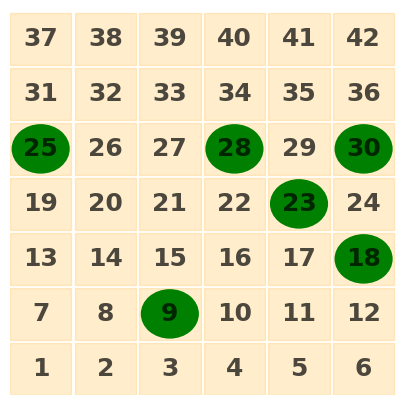

In [82]:
fig, ax = plt.subplots(figsize=(5,5))

ax.set_xlim(( 0, 6))
ax.set_ylim(( 0, 7))

ax.set_axis_off()

lot = lotto()


squares = []
i = 1
for y in range(7):
  for x in range(6):
    squares.append([Rectangle((x,y),width=0.95,height=0.95),i])
    i = i + 1

for s in squares:
  s[0].set_alpha(.2)
  s[0].set_color("orange")

  rx, ry = s[0].get_xy()
  cx = rx + s[0].get_width()/2.0
  cy = ry + s[0].get_height()/2.0
  ax.add_patch(s[0])

  ax.annotate(s[1], (cx, cy), color='w', weight='bold', 
                fontsize=18, c='black', ha='center', va='center', alpha= 0.7)
  
  if s[1] in lot:
    ax.add_patch(Circle((cx,cy),0.45,fc='green'))

print (lot)




# Aktuelle Lottozahlen

In [101]:
import requests
import bs4

def get_act_swiss_lotto():
  url = 'https://www.swisslos.ch/en/swisslotto/information/winning-numbers/winning-numbers.html'
  req = requests.get(url)
  web_page = bs4.BeautifulSoup(req.text, "lxml")
  tags_elements = web_page.find(name="div", attrs={"class": "actual-numbers___body"})
  numbersE = tags_elements.find_all(name="span", attrs={"class": "transform__center"})
  l = []
  for i in range(6):
    l.append(int(numbersE[i].text.strip("\n "))) # nur Zahlen ohne Zusatzzahl und ohne Replay
  return l


get_act_swiss_lotto()

[10, 20, 27, 34, 35, 38]

[10, 20, 27, 34, 35, 38]


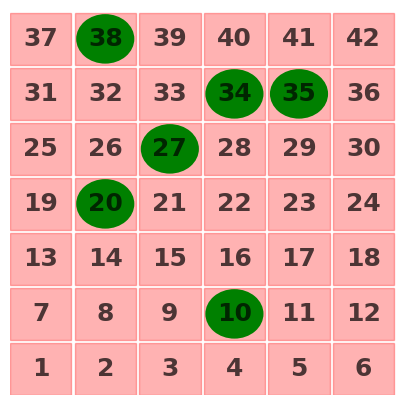

In [102]:
fig, ax = plt.subplots(figsize=(5,5))

ax.set_xlim(( 0, 6))
ax.set_ylim(( 0, 7))

ax.set_axis_off()

lot = get_act_swiss_lotto() # get actuall numbers


squares = []
i = 1
for y in range(7):
  for x in range(6):
    squares.append([Rectangle((x,y),width=0.95,height=0.95),i])
    i = i + 1

for s in squares:
  s[0].set_alpha(.3)
  s[0].set_color("red")

  rx, ry = s[0].get_xy()
  cx = rx + s[0].get_width()/2.0
  cy = ry + s[0].get_height()/2.0
  ax.add_patch(s[0])

  ax.annotate(s[1], (cx, cy), color='w', weight='bold', 
                fontsize=18, c='black', ha='center', va='center', alpha= 0.7)
  
  if s[1] in lot:
    ax.add_patch(Circle((cx,cy),0.45,fc='green'))

print (lot)

#Wieviele 3er, 4er, 5er und 6er, bei 100'000 Versuchen?


In [119]:
akt_lotto = get_act_swiss_lotto()
#print(akt_lotto)

def vergleich (l1,l2):
  z = 0
  for e in l1:
    if e in l2:
      z = z + 1
  return z

verteilung = np.zeros(7)
for i in range(100000):
  nl = lotto();
  z = vergleich(nl,akt_lotto)
  verteilung[z] += 1

print(f'''
Die aktuellen Lottozahlen sind: {akt_lotto}
Bei den 100'000 Versuchen gab es:
  {verteilung[3]:.0f}  \t3er
  {verteilung[4]:.0f}  \t\t4er
  {verteilung[5]:.0f}  \t\t5er
  {verteilung[6]:.0f}  \t\t6er
''')
  



Die aktuellen Lottozahlen sind: [10, 20, 27, 34, 35, 38]
Bei den 100'000 Versuchen gab es:
  2718  	3er
  177  		4er
  3  		5er
  0  		6er

